In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds 

In [2]:
# get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteX8OJ5X/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteX8OJ5X/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteX8OJ5X/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.GlobalMaxPooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 33s 67ms/step - loss: 0.5849 - accuracy: 0.6439 - val_loss: 0.2758 - val_accuracy: 0.8844
Epoch 2/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1989 - accuracy: 0.9242 - val_loss: 0.2753 - val_accuracy: 0.8847
Epoch 3/10
391/391 [==============================] - 17s 42ms/step - loss: 0.0682 - accuracy: 0.9822 - val_loss: 0.3066 - val_accuracy: 0.8912
Epoch 4/10
391/391 [==============================] - 17s 42ms/step - loss: 0.0160 - accuracy: 0.9981 - val_loss: 0.3395 - val_accuracy: 0.8974
Epoch 5/10
391/391 [==============================] - 17s 41ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3665 - val_accuracy: 0.8976
Epoch 6/10
391/391 [==============================] - 16s 39ms/step - loss: 9.2832e-04 - accuracy: 1.0000 - val_loss: 0.3878 - val_accuracy: 0.8984
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 5.0886e-04 - accuracy: 1.0000 - val_loss: 0.4056 - val_a

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

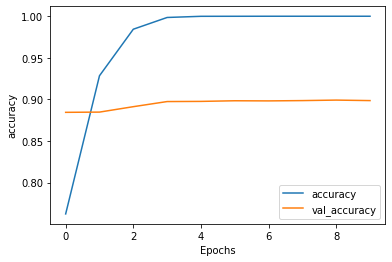

In [10]:
plot_graphs(history, 'accuracy')

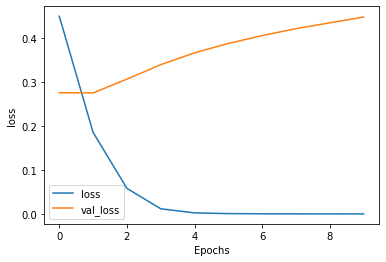

In [11]:
plot_graphs(history, 'loss')